In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import sys
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [0]:
tf.set_random_seed(777)

In [0]:
def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-5)

In [4]:
file_name = 'product.csv' # 데이터셋 이름 입력
colums = ['avg_1', 'avg_2', 'avg_3', 'min_1', 'min_2', 'min_3', 'max_1', 'max_2', 'max_3', 'rain_1', 'rain_2', 'rain_3', 'Product']
raw_dataframe = pd.read_csv(file_name, names=colums) # pandas의 Dataframe 형식으로 csv 를 읽음
raw_dataframe.info()

product_info = raw_dataframe.values[1:].astype(np.float)
print('info.shape : ', product_info.shape)
print('info[0] : ', product_info[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 13 columns):
avg_1      272 non-null float64
avg_2      272 non-null float64
avg_3      272 non-null float64
min_1      272 non-null float64
min_2      272 non-null float64
min_3      272 non-null float64
max_1      272 non-null float64
max_2      272 non-null float64
max_3      272 non-null float64
rain_1     272 non-null float64
rain_2     272 non-null float64
rain_3     272 non-null float64
Product    272 non-null float64
dtypes: float64(13)
memory usage: 27.7 KB
info.shape :  (271, 13)
info[0] :  [1.010e+01 1.360e+01 2.120e+01 4.300e+00 9.500e+00 1.590e+01 1.580e+01
 1.840e+01 2.700e+01 5.000e-01 1.600e+00 1.200e+00 3.839e+03]


In [0]:
input_data_colums_count = len(product_info[0])
output_data_colums_count = 1

seq_length = 16
rnn_cell_hidden_dim = 20
forget_bias = 1.0
num_stacked_layers = 1
keep_prob = 1.0

epoch_num = 50000
learning_rate = 0.01

In [6]:
temp_rain_data = product_info[:, :-1]
norm_temp_rain = MinMaxScaler(temp_rain_data)
print('temp_rain.shape : ', temp_rain_data.shape)
print('temp_rain[0] : ', temp_rain_data[0])
print('norm_temp_rain[0] : ', norm_temp_rain[0])
print('='*30)


product_num = product_info[:, -1:]
norm_product_num = MinMaxScaler(product_num)
print('product_num.shape : ', product_num.shape)
print('product_num[0] : ', product_num[0])
print('norm_product_num[0] : ', norm_product_num[0])
print('='*30)

x = np.concatenate((norm_temp_rain, norm_product_num), axis=1)
print('x.shape : ', x.shape)
print('x[0] : ', x[0])
print('x[-1] : ', x[-1])
print('='*30)

y = x[:, [-2]]
print('y[0] : ', y[0])
print('y[-1] : ', y[-1])

temp_rain.shape :  (271, 12)
temp_rain[0] :  [10.1 13.6 21.2  4.3  9.5 15.9 15.8 18.4 27.   0.5  1.6  1.2]
norm_temp_rain[0] :  [0.63013612 0.18333303 0.55319031 0.58252371 0.52272668 0.5781241
 0.635416   0.20731682 0.63013612 0.06249992 0.09420283 0.10810801]
product_num.shape :  (271, 1)
product_num[0] :  [3839.]
norm_product_num[0] :  [0.36691198]
x.shape :  (271, 13)
x[0] :  [0.63013612 0.18333303 0.55319031 0.58252371 0.52272668 0.5781241
 0.635416   0.20731682 0.63013612 0.06249992 0.09420283 0.10810801
 0.36691198]
x[-1] :  [0.76712224 0.78333203 0.55319031 0.79611573 0.84090814 0.640624
 0.7083326  0.6951211  0.6027389  0.6374992  0.21739115 0.12612601
 0.45512759]
y[0] :  [0.10810801]
y[-1] :  [0.12612601]


In [7]:
dataX = []
dataY = []

for i in range(0, len(y) - seq_length):
    _x = x[i : i + seq_length]
    _y = y[i + seq_length]
    if i is 0:
        print(_x, '->', _y)
    dataX.append(_x)
    dataY.append(_y)

[[0.63013612 0.18333303 0.55319031 0.58252371 0.52272668 0.5781241
  0.635416   0.20731682 0.63013612 0.06249992 0.09420283 0.10810801
  0.36691198]
 [0.45205418 0.33333278 0.65957306 0.57281498 0.56818117 0.71874888
  0.43749954 0.341463   0.68493057 0.02499997 0.1014492  0.12612601
  0.35305362]
 [0.38356112 0.23333294 0.34042481 0.61164989 0.62499929 0.67187395
  0.36458295 0.24390214 0.41095834 0.02499997 0.11594194 0.06306301
  0.41250119]
 [0.41095834 0.31666614 0.44680756 0.35922295 0.46590856 0.51562419
  0.60416604 0.46341407 0.6027389  0.11249986 0.13768106 0.24324302
  0.44920195]
 [0.36986251 0.18333303 0.23404206 0.57281498 0.56818117 0.67187395
  0.38541627 0.18292661 0.246575   0.04999994 0.07246372 0.43243204
  0.36777215]
 [0.63013612 0.53333244 0.87233857 0.62135862 0.69318103 0.82812371
  0.635416   0.5121945  0.80821807 0.09999988 0.08695646 0.14414401
  0.45866386]
 [0.7260264  0.44999925 0.46808411 0.66990226 0.67045378 0.62499902
  0.7083326  0.45121896 0.5753416

In [8]:
# train/test set 나누기
train_size = int(len(dataY) * 0.7)  # train size = 70%
test_size = len(dataY) - train_size

trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

# input placeholders
X = tf.placeholder(tf.float32, [None, seq_length, input_data_colums_count])
print('X: ', X)
Y = tf.placeholder(tf.float32, [None, 1])
print('Y: ', Y)


X:  Tensor("Placeholder:0", shape=(?, 16, 13), dtype=float32)
Y:  Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)


In [9]:
# 검증용 측정지표를 산출하기 위한 targets, predictions를 생성한다
targets = tf.placeholder(tf.float32, [None, 1])
print("targets: ", targets)
 
predictions = tf.placeholder(tf.float32, [None, 1])
print("predictions: ", predictions)

targets:  Tensor("Placeholder_2:0", shape=(?, 1), dtype=float32)
predictions:  Tensor("Placeholder_3:0", shape=(?, 1), dtype=float32)


In [0]:
# 모델(LSTM 네트워크) 생성
def lstm_cell():
    # LSTM셀을 생성
    # num_units: 각 Cell 출력 크기
    # forget_bias:  to the biases of the forget gate 
    #              (default: 1)  in order to reduce the scale of forgetting in the beginning of the training.
    # state_is_tuple: True ==> accepted and returned states are 2-tuples of the c_state and m_state.
    # state_is_tuple: False ==> they are concatenated along the column axis.
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=rnn_cell_hidden_dim, 
                                        forget_bias=forget_bias, state_is_tuple=True, activation=tf.nn.softsign)
    if keep_prob < 1.0:
        cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob=keep_prob)
    return cell

In [11]:
# num_stacked_layers개의 층으로 쌓인 Stacked RNNs 생성
stackedRNNs = [lstm_cell() for _ in range(num_stacked_layers)]
multi_cells = tf.contrib.rnn.MultiRNNCell(stackedRNNs, state_is_tuple=True) if num_stacked_layers > 1 else lstm_cell()
 
# RNN Cell(여기서는 LSTM셀임)들을 연결
hypothesis, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
print("hypothesis: ", hypothesis)

W0831 00:43:35.020349 139735493068672 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0831 00:43:35.021906 139735493068672 deprecation.py:323] From <ipython-input-10-2c54955f6881>:9: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W0831 00:43:35.024154 139735493068672 deprecation.py:323] From <ipython-input-11-c9b4539491e5>:5: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Pleas

hypothesis:  Tensor("rnn/transpose_1:0", shape=(?, 16, 20), dtype=float32)


In [0]:
# [:, -1]를 잘 살펴보자. LSTM RNN의 마지막 (hidden)출력만을 사용했다.
hypothesis = tf.contrib.layers.fully_connected(hypothesis[:, -1], output_data_colums_count, activation_fn=tf.identity)
 
 
# 손실함수로 평균제곱오차를 사용한다
loss = tf.reduce_sum(tf.square(hypothesis - Y))
# 최적화함수로 AdamOptimizer를 사용한다
optimizer = tf.train.AdamOptimizer(learning_rate)
 
train = optimizer.minimize(loss)
 
# RMSE(Root Mean Square Error)
# 제곱오차의 평균을 구하고 다시 제곱근을 구하면 평균 오차가 나온다
# rmse = tf.sqrt(tf.reduce_mean(tf.square(targets-predictions))) # 아래 코드와 같다
rmse = tf.sqrt(tf.reduce_mean(tf.squared_difference(targets, predictions)))

In [0]:
train_error_summary = [] # 학습용 데이터의 오류를 중간 중간 기록한다
test_error_summary = []  # 테스트용 데이터의 오류를 중간 중간 기록한다
test_predict = ''        # 테스트용데이터로 예측한 결과
 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [14]:
# 학습한다
start_time = datetime.datetime.now() # 시작시간을 기록한다
print('학습을 시작합니다...')
for epoch in range(epoch_num):
    _, _loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
    if ((epoch+1) % 100 == 0) or (epoch == epoch_num-1): # 100번째마다 또는 마지막 epoch인 경우
        # 학습용데이터로 rmse오차를 구한다
        train_predict = sess.run(hypothesis, feed_dict={X: trainX})
        train_error = sess.run(rmse, feed_dict={targets: trainY, predictions: train_predict})
        train_error_summary.append(train_error)
 
        # 테스트용데이터로 rmse오차를 구한다
        test_predict = sess.run(hypothesis, feed_dict={X: testX})
        test_error = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
        test_error_summary.append(test_error)
        
        # 현재 오류를 출력한다
        print("epoch: {}, train_error(A): {}, test_error(B): {}, B-A: {}".format(epoch+1, train_error, test_error, test_error-train_error))

학습을 시작합니다...
epoch: 100, train_error(A): 0.13331085443496704, test_error(B): 0.17888851463794708, B-A: 0.04557766020298004
epoch: 200, train_error(A): 0.1086459532380104, test_error(B): 0.21913492679595947, B-A: 0.11048897355794907
epoch: 300, train_error(A): 0.07912198454141617, test_error(B): 0.13985566794872284, B-A: 0.06073368340730667
epoch: 400, train_error(A): 0.09931717813014984, test_error(B): 0.22564439475536346, B-A: 0.12632721662521362
epoch: 500, train_error(A): 0.051383331418037415, test_error(B): 0.13106012344360352, B-A: 0.0796767920255661
epoch: 600, train_error(A): 0.06753654778003693, test_error(B): 0.18684178590774536, B-A: 0.11930523812770844
epoch: 700, train_error(A): 0.02462942712008953, test_error(B): 0.15027983486652374, B-A: 0.12565040588378906
epoch: 800, train_error(A): 0.020662441849708557, test_error(B): 0.17379039525985718, B-A: 0.15312795341014862
epoch: 900, train_error(A): 0.010687891393899918, test_error(B): 0.18981795012950897, B-A: 0.17913006246089

In [15]:
end_time = datetime.datetime.now() # 종료시간을 기록한다
elapsed_time = end_time - start_time # 경과시간을 구한다
print('elapsed_time:',elapsed_time)
print('elapsed_time per epoch:',elapsed_time/epoch_num)
 
 
# 하이퍼파라미터 출력
print('input_data_column_cnt:', input_data_colums_count)
print('output_data_column_cnt:', output_data_colums_count)
 
print('seq_length:', seq_length)
print('rnn_cell_hidden_dim:', rnn_cell_hidden_dim)
print('forget_bias:', forget_bias)
print('num_stacked_layers:', num_stacked_layers)
print('keep_prob:', keep_prob)
 
print('epoch_num:', epoch_num)
print('learning_rate:', learning_rate)
 
print('train_error:', train_error_summary[-1])
print('test_error:', test_error_summary[-1])
print('min_test_error:', np.min(test_error_summary))

elapsed_time: 0:00:11.755077
elapsed_time per epoch: 0:00:00.023510
input_data_column_cnt: 13
output_data_column_cnt: 1
seq_length: 16
rnn_cell_hidden_dim: 20
forget_bias: 1.0
num_stacked_layers: 1
keep_prob: 1.0
epoch_num: 500
learning_rate: 0.01
train_error: 0.04625409
test_error: 0.15960394
min_test_error: 0.13006368


Text(0, 0.5, 'Root Mean Square Error')

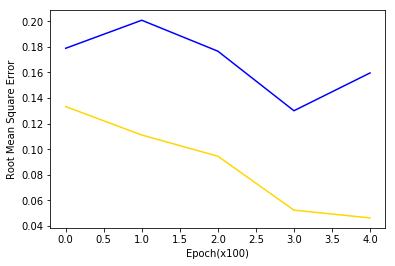

In [16]:
# 결과 그래프 출력
plt.figure(1)
plt.plot(train_error_summary, 'gold')
plt.plot(test_error_summary, 'b')
plt.xlabel('Epoch(x100)')
plt.ylabel('Root Mean Square Error')

In [17]:
# sequence length만큼의 가장 최근 데이터를 슬라이싱한다
recent_data = np.array([x[len(x)-seq_length : ]])
print("recent_data.shape:", recent_data.shape)
print("recent_data:", recent_data)
 
# 내년 생산량을 예측한다.
test_predict = sess.run(hypothesis, feed_dict={X: recent_data})
 
print("test_predict", test_predict[0])
test_predict = reverse_min_max_scaling(product_num,test_predict) # 생산량 데이터를 역정규화
print("내년 생산량 : ", test_predict[0]) # 예측한 생산량을 출력

recent_data.shape: (1, 16, 13)
recent_data: [[[0.49315001 0.51666581 0.44680756 0.41747532 0.47727218 0.24999961
   0.78124919 0.82926728 0.83561529 0.1624998  0.09420283 0.08108101
   0.44040906]
  [0.61643751 0.91666514 0.51063721 0.69902845 0.9204535  0.60937405
   0.52083279 0.78048685 0.49315001 0.18749977 0.04347823 0.09009001
   0.47166205]
  [0.58904029 0.68333219 0.68084962 0.66019353 0.76136277 0.7031239
   0.635416   0.70731621 0.71232779 0.1624998  0.04347823 0.09909901
   0.43954889]
  [0.43835556 0.39999933 0.29787171 0.68931972 0.74999915 0.67187395
   0.3541663  0.341463   0.246575   0.1624998  0.04347823 0.09009001
   0.30526618]
  [0.63013612 0.74999875 0.68084962 0.56310625 0.70454465 0.51562419
   0.71874925 0.84146239 0.80821807 0.21249973 0.07246372 0.08108101
   0.15769856]
  [0.42465695 0.48333253 0.38297791 0.50485388 0.64772654 0.43749932
   0.51041613 0.53658471 0.53424584 0.17499978 0.07246372 0.07207201
   0.4710886 ]
  [0.73972501 0.91666514 0.89361512 0.6